참조 : https://www.kaggle.com/ash316/eda-to-prediction-dietanic

#Part1: Exploratory Data Analysis(EDA)

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
data=pd.read_csv('/content/train.csv')

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data.isna().sum() # nan값 확인

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

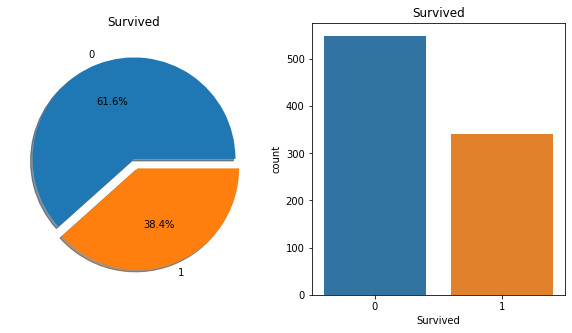

In [7]:
f,ax=plt.subplots(1,2,figsize=(10,5))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [8]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

사고에서 살아남은 승객은 많지 않은 것이 분명합니다.

훈련 세트에 있는 891명의 승객 중 약 350명만이 살아 남았습니다. 즉 전체 훈련 세트의 38.4%만이 충돌에서 살아 남았습니다. 데이터에서 더 나은 통찰력을 얻고 어떤 범주의 승객이 살아남 았는지, 누가 그렇지 않았는지 확인하려면 더 많이 파헤쳐야합니다.

데이터 세트의 다양한 기능을 사용하여 생존율을 확인하려고합니다. 일부 기능은 성별(Sex), 출국 항(Embarked), 나이(Age) 등입니다.

먼저 다양한 유형의 기능을 이해하겠습니다.

##Types Of Features

**범주적 특징 (Categorical Features)** :

범주형 변수는 범주가 두 개 이상이고 해당 기능의 각 값을 범주별로 분류 할 수있는 변수입니다. 예를 들어 성별은 두 범주 (남성 및 여성)를 갖는 범주 형 변수입니다. 이제 우리는 그러한 변수를 정렬하거나 순서를 지정할 수 없습니다. **명목 변수(Nominal Variables)**라고도합니다.

**데이터 세트의 Categorical Features : Sex, Embarked.**

\
**서수 특징 (Ordinal Features)** :

순서형 변수는 범주형 값과 비슷하지만 값 사이에 상대적인 순서나 정렬을 사용할 수 있다는 차이점이 있습니다. 예를 들어 : Tall, Medium, Short 값이있는 Height와 같은 기능이있는 경우 Height는 서수 변수입니다. 여기서 우리는 변수에 상대적인 정렬을 할 수 있습니다.

**데이터 세트의 Ordinal Features : PClass**

\
**연속 특징 (Continous Feature)** :

두 지점 사이 또는 특성 열의 최소 또는 최대 값 사이의 값을 가질 수있는 특성은 연속적이라고합니다.

**데이터 세트의 Continous Feature : Age**

\
##Analysing The Features

\
##Sex--> Categorical Feature

In [9]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

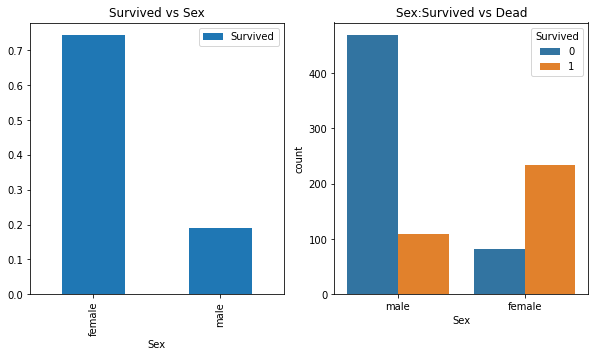

In [10]:
f,ax=plt.subplots(1,2,figsize=(10,5))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
# ax[0].set_xticklabels([female,male],rotation=0)
sns.countplot('Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

배에 탄 남성의 수는 여성의 수보다 훨씬 많습니다. 그럼에도 불구하고 살아남은 여성의 수는 살아남은 남성의 거의 두 배입니다. 배에 탄 여성의 생존율은 약 75 %이고 남성의 생존율은 약 18-19 %입니다.

이것은 모델링에 매우 중요한 기능으로 보입니다. 하지만 최고인가??

다른 기능을 확인해 보겠습니다.

\
##Pclass --> Ordinal Feature

In [11]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


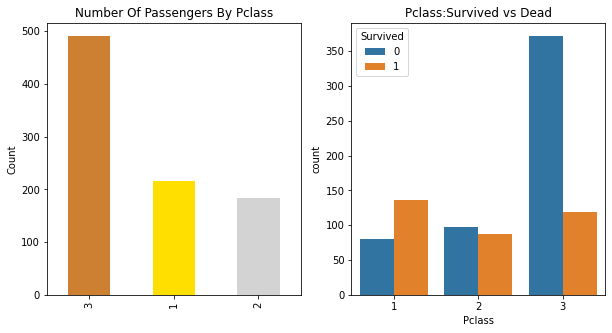

In [12]:
f,ax=plt.subplots(1,2,figsize=(10,5))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

사람들은 돈으로 모든 것을 살 수 없다고 말합니다. 그러나 우리는 Pclass 1의 Passenegers가 구조하는 동안 매우 높은 우선 순위를 부여 받았다는 것을 분명히 알 수 있습니다. Pclass 3의 승객 수가 훨씬 많았지 만 여전히 생존율은 약 25 %로 매우 낮습니다.

Pclass 1의 경우 생존율은 약 63 %이고 Pclass2의 경우 약 48 %입니다. 따라서 돈과 지위가 중요합니다.

조금 더 들어가서 다른 흥미로운 관찰을 확인합시다. Sex와 Pclass 함께 생존율을 확인하세요.

In [13]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

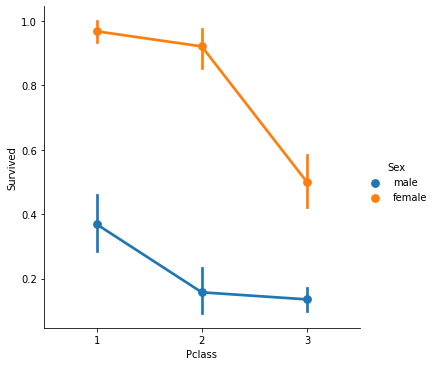

In [14]:
sns.factorplot('Pclass','Survived',hue='Sex',data=data)
plt.show()

FactorPlot을 사용하면 범주형 값을 쉽게 분리 할 수 있다

\
CrossTab과 FactorPlot을 보면 Pclass1의 여성 94 명 중 3 명만이 사망했기 때문에 Pclass1 여성의 생존율이 약 95-96 %임을 쉽게 추론 할 수 있습니다.

\
Pclass에 관계없이 구조하는 동안 여성이 최우선 순위를 가졌음이 분명합니다. Pclass1의 남성조차도 생존율이 매우 낮습니다.

\
Pclass도 중요한 기능인 것 같습니다. 다른 기능을 분석해 보겠습니다.

##Age--> Continous Feature

In [15]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


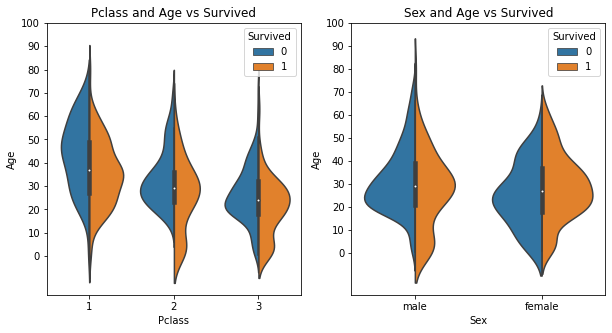

In [16]:
f,ax=plt.subplots(1,2,figsize=(10,5))
sns.violinplot("Pclass","Age", hue="Survived", data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

관찰 :

1) Pclass에 따라 어린이의 수가 증가하고 10 세 미만의 행인(즉, 어린이)의 생존율은 Pclass에 관계없이 양호해 보입니다.

2) Pclass1의 20-50 세 Passenegers의 생존 가능성은 높고 여성에게 더 좋습니다.

3) 남성의 경우 연령이 증가함에 따라 생존 확률이 감소합니다.

\
앞서 살펴본 것처럼 Age feature에는 177 개의 null 값이 있습니다. 이러한 NaN 값을 대체하기 위해 데이터 세트의 평균 연령을 할당 할 수 있습니다.

\
하지만 문제는 다양한 연령대의 사람들이 많다는 것입니다. 우리는 평균 나이가 29 세인 4 살짜리 아이를 배정 할 수 없습니다.

\
Name feature를 살펴보면 이름에 Mr 또는 Mrs와 같은 인사말이 있음을 알 수 있습니다. 따라서 Mr 및 Mrs의 평균 값을 각 그룹에 할당 할 수 있습니다.

In [17]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.')

In [18]:
data['Initial'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

자 여기 정규식을 사용하고 있습니다 : ([A-Za-z] +)\\. 그래서 그것이하는 일은 A-Z 또는 a-z 사이에 있고 뒤에. (점)이 오는 문자열을 찾는 것입니다. 그래서 우리는 이름에서 이니셜을 성공적으로 추출했습니다.

In [19]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r') #성별로 이니셜 체크

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Miss를 나타내는 Mlle 또는 Mme와 같이 철자가 틀린 이니셜이 있습니다.

그것들을 Miss로 바꾸고 다른 값에 대해서도 같은 것으로 바꿀 것입니다.

In [20]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [21]:
data.groupby('Initial')['Age'].mean() # 이니셜로 평균나이 확인

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

Filling NaN Ages

In [22]:
## Assigning the NaN Values with the Ceil values of the mean ages
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [23]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Initial          0
dtype: int64

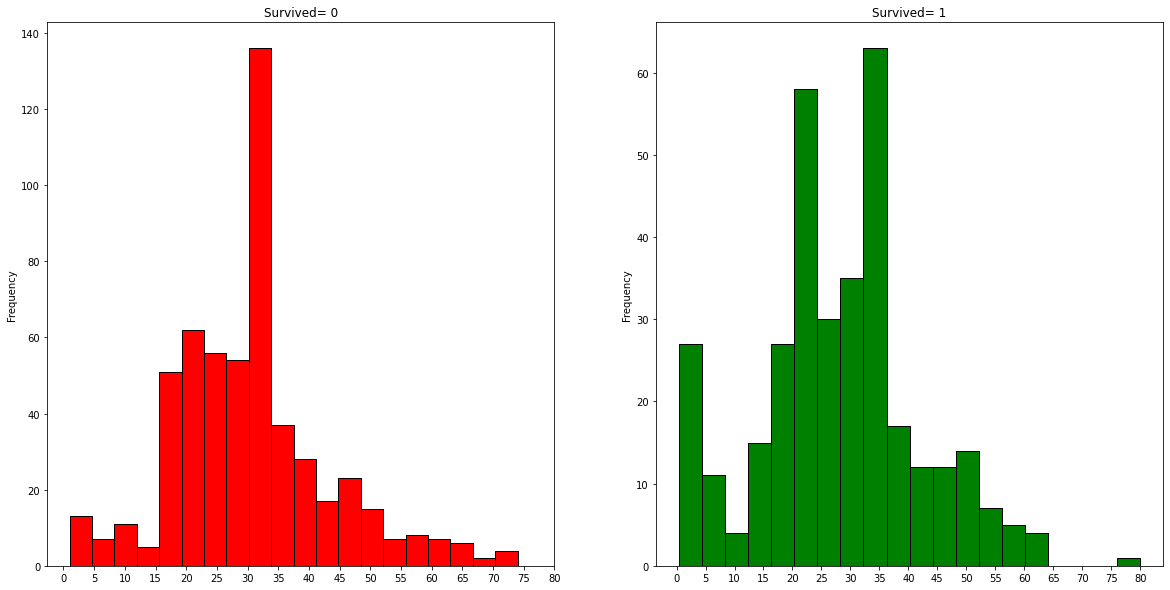

In [24]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

관찰 :

1) 많은 수의 유아(5 세 미만)가 구해졌다. (여성과 아동 우선 정책).

2) 가장 나이 많은 승객 (80 세)을 구했습니다.

3) 최대 사망자 수는 30-40 세였다.

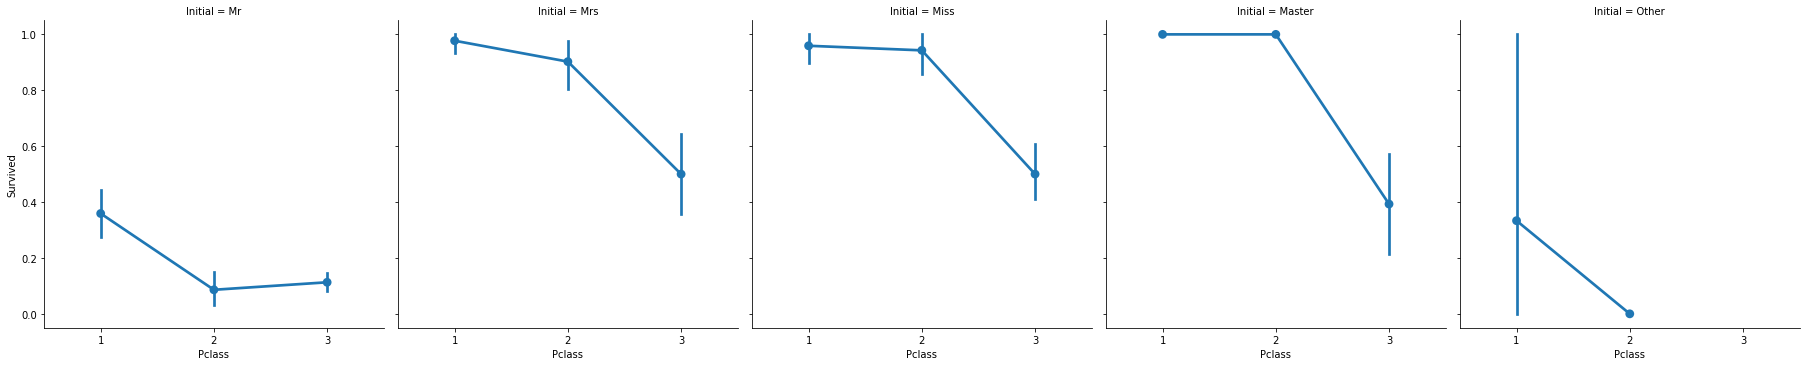

In [25]:
sns.factorplot('Pclass','Survived',col='Initial',data=data)
plt.show()

따라서 여성과 아동 우선 정책은 계급에 관계없이 유효합니다.

##Embarked--> Categorical Value

In [26]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap='summer_r')

**승선 항에 의한 생존 가능성**

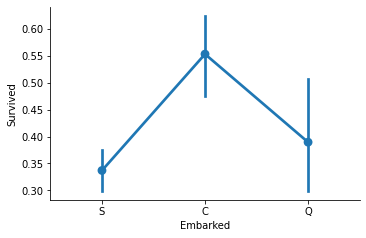

In [27]:
sns.factorplot('Embarked','Survived',data=data)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

'C항'의 생존 가능성은 약 0.55로 가장 높고 'S항'의 경우 가장 낮습니다.

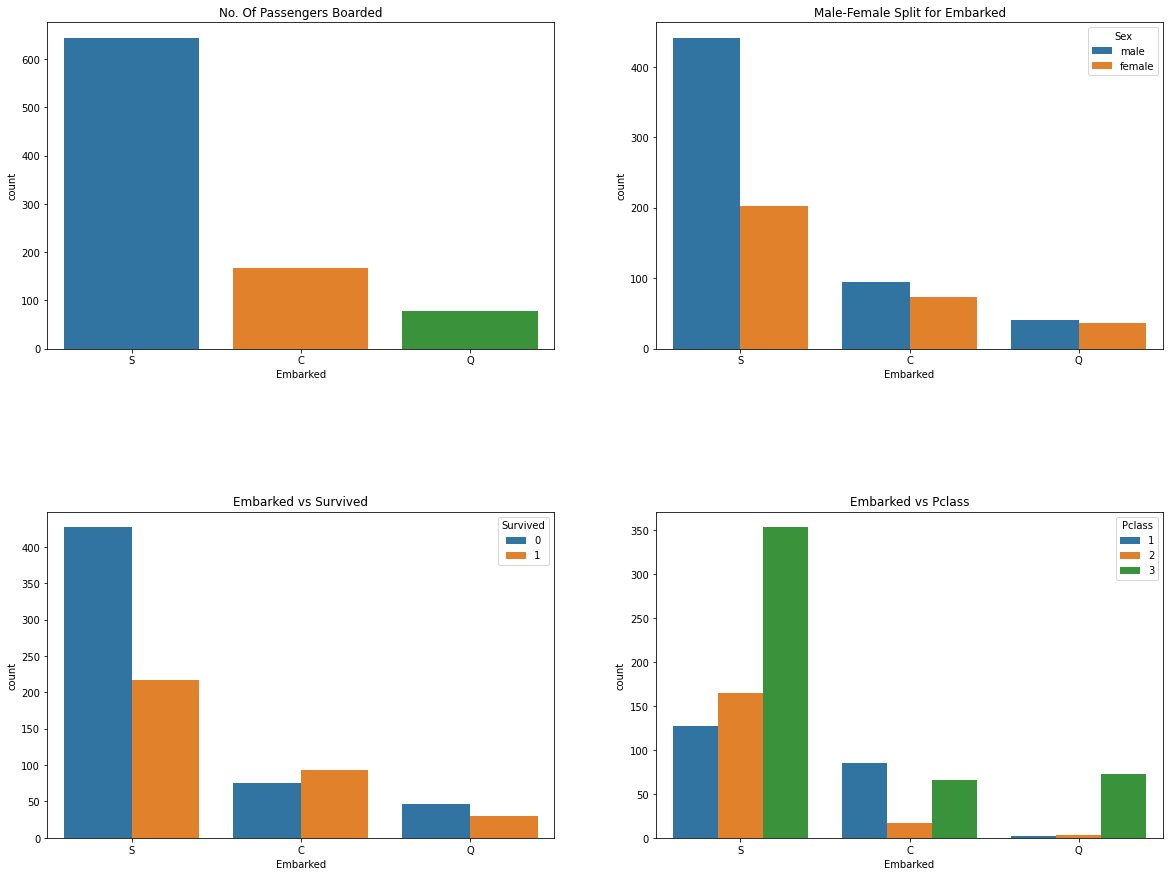

In [28]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

관찰 :

1) S에서 탑승 한 승객 대다수는 Pclass3 탑승객입니다.

2) C에서 온 승객들은 그들 중 좋은 비율이 살아남 았기 때문에 운이 좋은 것 같습니다. 그 이유는 모든 Pclass1 및 Pclass2 승객의 구조 때문일 수 있습니다.

3) Embark S는 대부분의 부자들이 탑승 한 항구. 여전히 생존 가능성은 낮습니다. Pclass3의 많은 승객이 81 % 정도 생존하지 못했기 때문입니다.

4) 포트 Q는 승객의 거의 95 %가 Pclass3이었습니다.

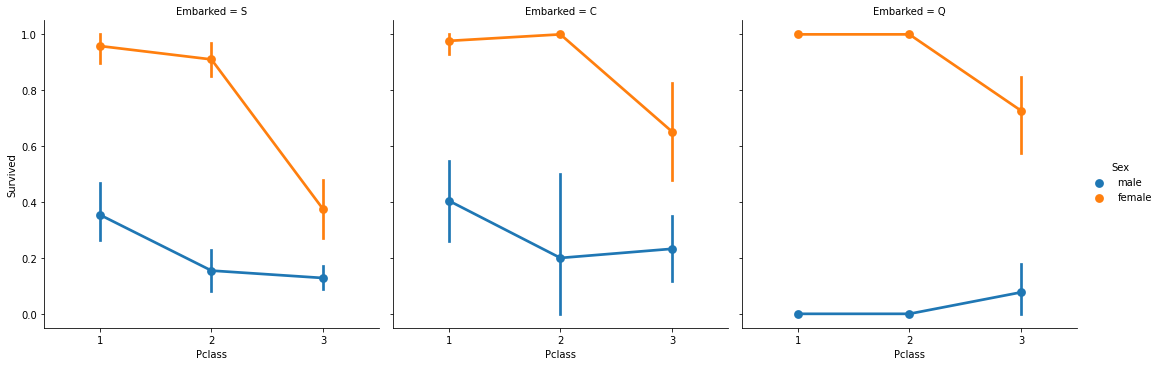

In [29]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=data)
plt.show()

관찰 :

1) Pclass에 관계없이 Pclass1과 Pclass2의 여성의 생존 확률은 거의 1입니다.

2) 'S항'은 남성과 여성 모두 생존율이 매우 낮기 때문에 Pclass3 탑승객의 생존율이 낮다.(돈 문제)

3) 'Q항'은 거의 모든 탑승객이 Pclass 3이기때문에  남성의 생존율이 가장 낮아보입니다.

\
**Filling Embarked NaN**

'S항'이 탑승한 승객의 수가 가장 많으므로 NaN을 S로 대체합니다.

In [30]:
data['Embarked'].fillna('S',inplace=True)

In [31]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Initial          0
dtype: int64

## SibSip-->Discrete Feature

이 feature는 개인이 혼자인지 가족과 함께 있는지를 나타냅니다.

Sibling(형제,자매) = 형제, 자매, 의붓 형제, 이복 누이

Spouse(배우자) = 남편, 아내

In [32]:
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


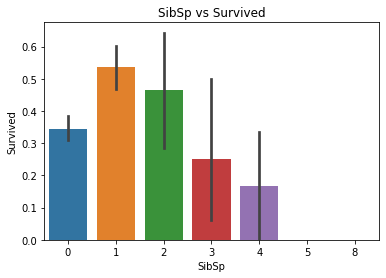

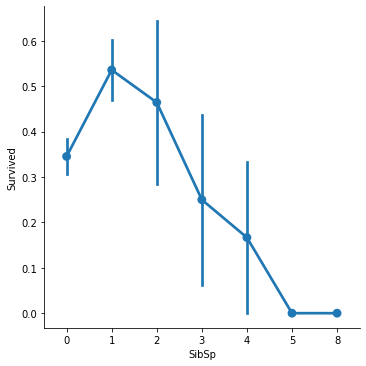

In [33]:
# f, ax = plt.subplots(1, 2, figsize=(15,6))

sns.barplot('SibSp', 'Survived', data=data).set_title('SibSp vs Survived')

sns.factorplot('SibSp', 'Survived', data=data)

plt.show()

In [34]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


관찰 :

barplot과 factorplot은 승객이 형제없이 혼자 탑승 할 경우 생존율이 34.5 %임을 보여줍니다. 형제 자매 수가 증가하면 그래프는 대략 감소합니다. 이것은 의미가 있습니다. 즉, 가족이 있다면 내가 살기보다 그들을 구하려고 노력할 것입니다. 놀랍게도 5-8 인 가족의 생존율은 0 %입니다. 

그 이유는 Pclass입니다. 교차 분석은 SibSp> 3을 가진 승객이 모두 Pclass3에 있음을 보여줍니다.

## Parch

In [35]:
pd.crosstab(data.Parch,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


crosstab을 통해 또 구성원이 많은 가족들은 Pclass3에 속함을 알 수 있습니다.

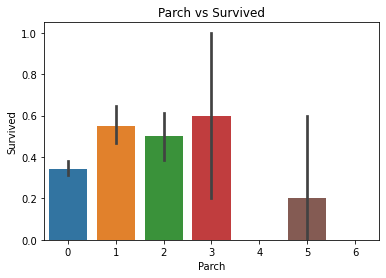

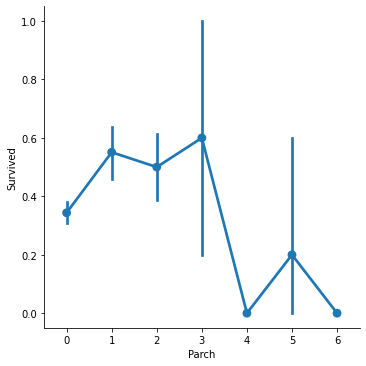

In [36]:
sns.barplot('Parch','Survived',data=data).set_title('Parch vs Survived')
sns.factorplot('Parch','Survived',data=data)
plt.show()

관찰 :

여기에서도 결과는 매우 유사합니다. 부모와 함께 탑승 한 승객은 생존 가능성이 더 높습니다. 그러나 숫자가 증가함에 따라 감소합니다.

생존 가능성은 배에 1-3 명의 부모가있는 사람에게 좋습니다. 혼자있는 것도 생존하기가 어려우며, 가족이 4명이상 탑승한 경우에도 생존률은 감소했습니다.

## Fare--> Continous Feature

In [37]:
print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.2042079685746


가장 낮은 요금은 0원입니다.

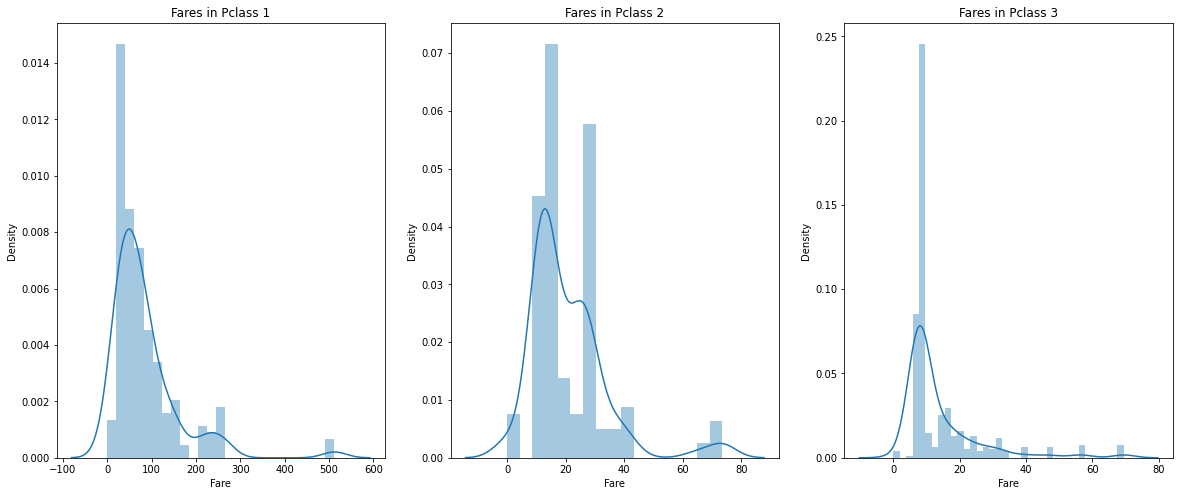

In [38]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

Pclass 1 탑승객의 경우 요금 분포가 넓게 퍼져있습니다. 그리고 Pclass의 등급이 낮아질 때마다 분포는 좁아집니다. 이 변수는 연속형이기 때문에, 우리는 binning을 통해 이산형 값들로 변환해줄 것입니다.

#모든 Feature들의 관찰 결과 요약 :

- Sex : 여성의 생존확률이 남성에 비해 높았습니다.
- Pclass :1st 클래스 탑승객의 생존률이 높은 경향을 보였습니다. Pclass 3의 생존률은 매우 낮았습니다.
여성의 경우 Pclass 1 탑승객의 생존률은 거의 1이었고, Pclass 2의 경우에도 높았습니다. 결국 생존에는 돈이 중요했습니다.
- Age : 5-10세보다 적은 어린이들의 생존확률이 높았습니다. 15-35세의 탑승객들은 많이 사망했습니다.
- Embarked : 흥미로운 Feature 였습니다. 다수의 Pclass 1 탑승객이 S에서 제일 많았지만, C에서 탑승한 승객의 생존률이 더 높았습니다.
Q에서 탑승한 승객은 거의 다 Pclass 3 에 속했습니다.
- Parch + SibSp : 1-2명의 형제자매, 1-3명의 가족, 자녀와 함께 탑승한 경우가 혼자 탑승 또는 많은 수의 가족과 함께 탑승한 경우보다 훨씬 생존률이 높았습니다.

# Correlation Between The Features

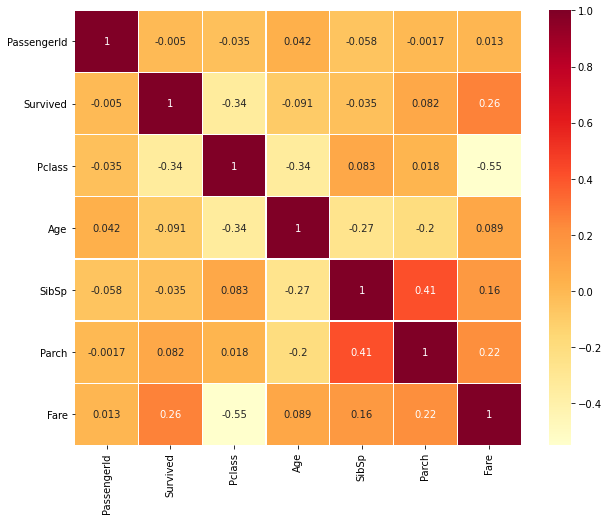

In [39]:
sns.heatmap(data.corr(),annot=True,cmap='YlOrRd',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

**Heatmap의 해석**

먼저 알아야 할 것은, 숫자데이터가 아닌 문자열 데이터의 상관관계는 구할 수 없다는 것입니다.
plot을 이해하기전에 상관관계가 무엇인지 보겠습니다.

- 양의 상관관계(Positive Correlation) :
feature A의 증가하는데 feature B가 증가한다면, 두 feature는 양의 상관관계입니다. 1 은 완전 양의 상관관계를 의미합니다.
- 음의 상관관계(Negative Correlation) :
feature A의 감소하는데 feature B가 증가한다면, 두 feature는 음의 상관관계입니다. -1 은 완전 음의 상관관계를 의미합니다.

두 Feature가 상당히 높은, 혹은 완전한 양의 상관관계를 가지고 있다고 하면, 한 feature값이 증가하면 다른 feature의 값도 증가합니다.
이것은 두 feature가 매우 비슷한 정보를 가지고 있으며, 그 정보간의 분산이 거의 없다는 것을 의미합니다. 이를 다중공선성(MultiColinearity)이라 합니다.

이 변수들이 redundant(불필요한)할 때, 우리는 그 변수를 둘 다 사용해야할까요?
모델을 만들거나 학습시킬 때, 학습시간을 줄이는 등 다른 이점을 위해 redudant한 feature는 제거되도록 해야합니다.

위의 Heatmap을 보았을 때, feature들간의 상관관계는 그렇게 높아보이지 않습니다.
가장 높은 상관관계를 지닌 두 변수는 SibSp와 Parch로 상관계수는 0.41입니다. 그렇기 때문에 모든 feature를 사용하도록 하겠습니다.

# Part 2 : Feature Engineering and Data Cleansing

Feature Engineering이 무엇일까요?

feature들이 있는 dataset이 주어졌을 때, 모든 feature가 중요하진 않습니다.
제거되어야 할 redundant한 Feature가 있을 수 있습니다. 그리고 다른 feature의 관찰, 정보 추출을 통해 새로운 feature를 만들 수도 있습니다.

Name으로부터 Initial 을 만들어낸 것도 한 예입니다. 새로운 feature를 만들거나 제거해야할 Feature가 있는지 살펴보겠습니다.
그리고 예측 모델에 적합한 형태로 feature들을 변환하겠습니다.

## Age_band
**Problem With Age Feature:**

먼저 언급했듯이, Age는 continuous feature 입니다. continuous feature의 경우, 머신러닝모델에 있어 문제가 하나 있습니다.

가령, 운동선수들을 성별로 그룹을 나눈다고 할 때, 우리는 쉽게 남성, 여성으로 나눌 수 있습니다.

연령으로 그룹을 나눈다고 할때, 어떻게 나눌수 있을까요? 만약 30명의 사람에 30개의 연령값이 있다고 하겠습니다. 이런 경우가 문제가 됩니다.

우리는 contiunous 값을 category값으로 Binning이나 Normalization을 통해 변환해야합니다. 이번에는 binning을 통해 연령에 하나의 값을 할당하겠습니다.

최대 연령이 80세이기 떄문에, 0부터 80세까지의 연령을 5개의 bin으로 나누겠습니다. 80/5 = 16 이기 때문에, bin하나의 사이즈는 16입니다.


In [40]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [41]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer') # 각 연령구간의 탑승객 수 체크

,Age_band
1,382
2,325
0,104
3,69
4,11


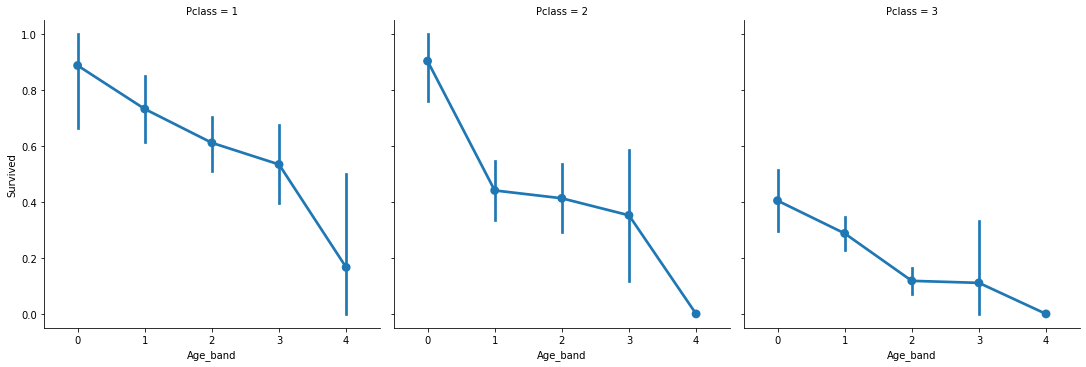

In [42]:
sns.factorplot('Age_band','Survived',data=data,col='Pclass')
plt.show()

Pclass와 관계없이 연령이 증가할수록 생존률이 낮아집니다.

## Family_Size and Alone

이번에는 "Family_Size"와 "Alone" Feature를 만들어 분석하겠습니다.
이 Feature들은 Parch와 SibSp의 요약입니다. 가족의 수와 생존률의 관계를 체크하기 위한 통합된 데이터를 얻을 수 있습니다.

Alone은 승객이 혼자인지 아닌지를 나타냅니다.

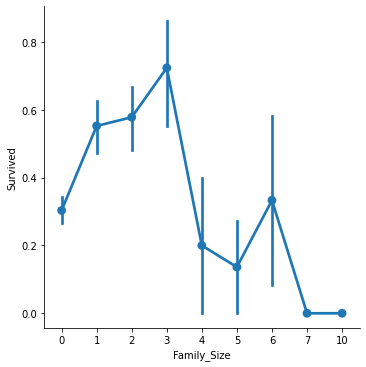

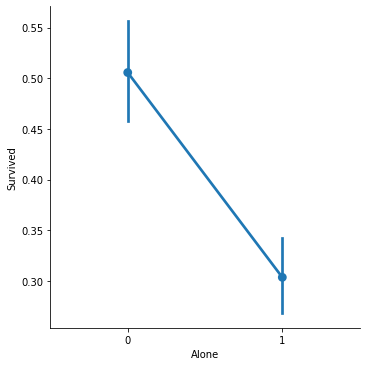

In [43]:
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp']#family size
data['Alone']=0
data.loc[data.Family_Size==0,'Alone']=1#Alone

sns.factorplot('Family_Size','Survived',data=data)
sns.factorplot('Alone','Survived',data=data)
plt.show()

Family_Size = 0 은 탑승객이 혼자임을 의미합니다. 혼자일 때, 생존률은 매우 낮습니다.

가족 수가 4명 이상일 때도 생존률은 감소합니다. 때문에 모델링에 중요한 Feature인 것 같습니다. 조금 더 분석해보겠습니다.

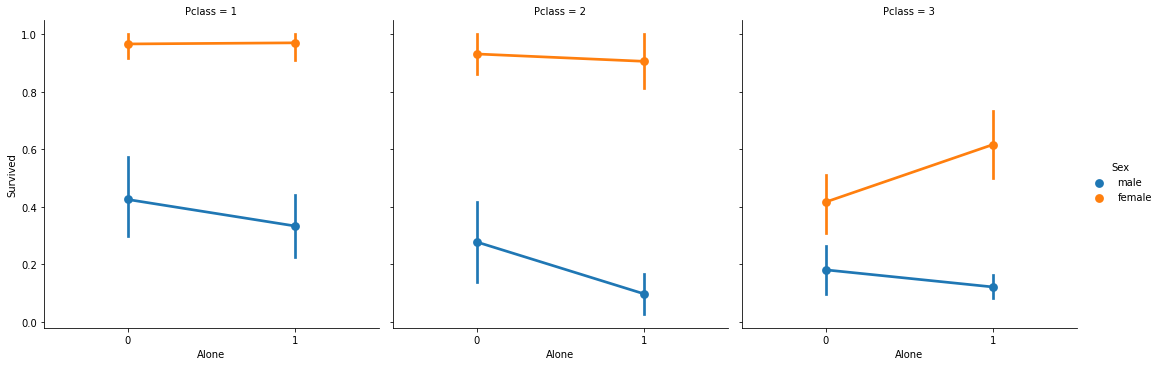

In [44]:
sns.factorplot('Alone','Survived',data=data,hue='Sex',col='Pclass')
plt.show()

Pclass와 무관하게 혼자 탑승한 경우는 위험합니다. 

하지만 예외적으로 Pclass 3 여성 탑승객의 생존률은 가족과 함께 탑승하지 않은 경우보다 오히려 높습니다.

## Fare_Range
Fare는 연속형 Feature이기 때문에, 이것을 서수형 값(Ordinal value)로 변환하겠습니다. 이 작업에pandas.qcut을 사용할 것입니다.

qcut 은 우리가 입력한 구간의 수(bin)에 따라 데이터 값을 분할 해줍니다. 가령 우리가 5개 구간을 입력하면, 5개의 구간으로 데이터 수를 균일하게 분할합니다.

In [45]:
data['Fare_Range']=pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


위에서 얘기한 것처럼, Fare_Range가 증가할 수록 생존률도 증가합니다.

하지만 우리는 Fare_Range를 그대로 사용할 수 없습니다.

 Age_Band에서 했던 것과 동일하게 하나의 값으로 변환해주어야 합니다.

In [46]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

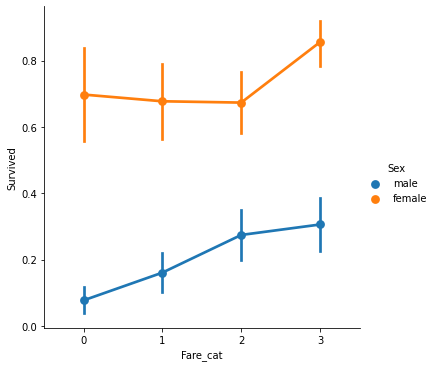

In [47]:
sns.factorplot('Fare_cat','Survived',data=data,hue='Sex')
plt.show()

Fare_cat 이 증가할수록 생존률이 증가합니다. 이것도 Sex와 함께 모델링에 중요한 Feature가 될 것 같습니다.

## 문자열 값을 숫자형으로 변환하기

문자열 값을 머신러닝 모델에 사용할 수 없기 때문에, Sex, Embarked 등의 feature를 숫자값으로 변환해주어야 합니다.

In [48]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

## 필요하지 않은 Feature를 drop하기

Name → Categorical value로 변환할 수 없으므로 필요 없습니다.

Age → Age_band가 있기 때문에 필요 없습니다.

Ticket → 카테고리화 될 수 없는 무작위 문자열입니다.

Fare → Fare_cat이 있기 때문에 필요없습니다.

Cabin → NaN 값이 너무 많고, 많은 승객에 따라 cabin 값이 많습니다. 그렇기 때문에 필요하지 않습니다.

Fare_Range → Fare_cat이 있어서 필요 없습니다.

PassengerId → 카테고리화 될 수 없습니다

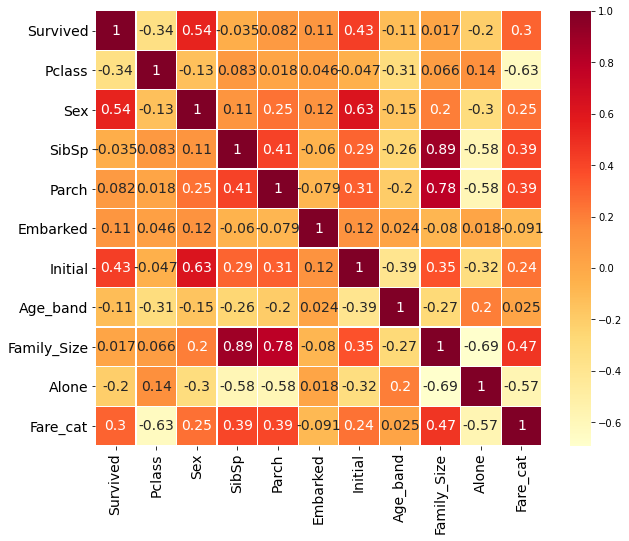

In [49]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)

sns.heatmap(data.corr(),annot=True,cmap='YlOrRd',linewidths=0.2,annot_kws={'size':14})
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

위의 Correlation plot에서 몇몇 양의 상관관계를 가진 feature들을 볼 수 있습니다.
Family_Size와 SibSp,Parch가 양의 상관관계를 가지고, Alone과 Family_Size는 음의 상관관계를 가지고 있습니다.

# Part 3: Predictive Modeling

EDA를 통해 인사이트를 얻었습다. 하지만 그것만으로는 승객의 생존 여부를 정확히 예측할 수 없습니다. 우리는 몇몇 훌륭한 분류 알고리즘을 사용하여 승객의 생존여부를 예측할 것입니다. 아래의 알고리즘을 모델을 만드는데 사용할 것입니다.

1) Logistics Regression

2) Support Vector Machines (Linear and radial)

3) Random Foresr

4) K-Nearesr Neighbors

5) Naive Bayes

6) Decision Tree

7) Logistic Regressio

In [50]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.metrics import classification_report

In [51]:
train,test=train_test_split(data,test_size=0.3,random_state=0,stratify=data['Survived']) #stratify : 계층화 샘플링
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=data[data.columns[1:]]
Y=data['Survived']

In [52]:
print(train.columns[1:])
print(train.columns[:1])

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Initial', 'Age_band',
       'Family_Size', 'Alone', 'Fare_cat'],
      dtype='object')
Index(['Survived'], dtype='object')


## Radial Support Vector Machines(rbf-SVM)

In [53]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(test_Y,prediction1))
print(classification_report(test_Y, prediction1))

Accuracy for rbf SVM is  0.835820895522388
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       165
           1       0.84      0.71      0.77       103

    accuracy                           0.84       268
   macro avg       0.84      0.81      0.82       268
weighted avg       0.84      0.84      0.83       268



## Linear Support Vector Machines(linear-SVM)

In [54]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_Y))
print(classification_report(prediction2, test_Y))

Accuracy for linear SVM is 0.8171641791044776
              precision    recall  f1-score   support

           0       0.87      0.84      0.85       172
           1       0.73      0.78      0.75        96

    accuracy                           0.82       268
   macro avg       0.80      0.81      0.80       268
weighted avg       0.82      0.82      0.82       268



## Logistic Regression

In [55]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))
print(classification_report(prediction3, test_Y))

The accuracy of the Logistic Regression is 0.8134328358208955
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       177
           1       0.70      0.79      0.74        91

    accuracy                           0.81       268
   macro avg       0.79      0.81      0.80       268
weighted avg       0.82      0.81      0.82       268



## Decision Tree


In [56]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))
print(classification_report(prediction4, test_Y))

The accuracy of the Decision Tree is 0.8022388059701493
              precision    recall  f1-score   support

           0       0.90      0.80      0.85       186
           1       0.64      0.80      0.71        82

    accuracy                           0.80       268
   macro avg       0.77      0.80      0.78       268
weighted avg       0.82      0.80      0.81       268



## K-Nearest Neighbours(KNN)

In [57]:
model=KNeighborsClassifier() 
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))
print(classification_report(prediction5, test_Y))

The accuracy of the KNN is 0.832089552238806
              precision    recall  f1-score   support

           0       0.88      0.85      0.87       172
           1       0.75      0.80      0.77        96

    accuracy                           0.83       268
   macro avg       0.82      0.83      0.82       268
weighted avg       0.84      0.83      0.83       268



KNN 모델의 정확도는 n_neighbors 값을 조절하면 변화합니다. 기본값은 5입니다. n_neighbor의 여러 값에 따른 정확도를 체크해보겠습니다.

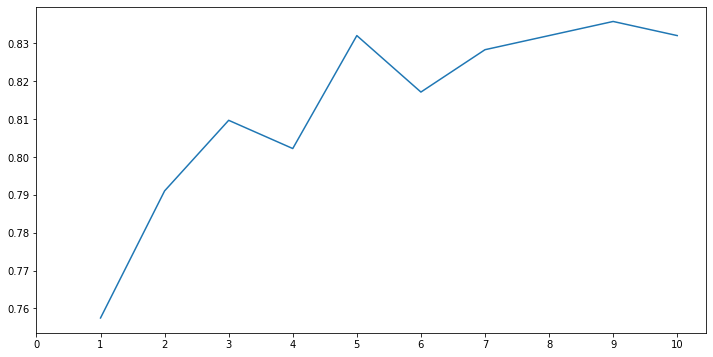

Accuracies for different values of n are: [0.75746269 0.79104478 0.80970149 0.80223881 0.83208955 0.81716418
 0.82835821 0.83208955 0.8358209  0.83208955] with the max value as  0.835820895522388


In [58]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

## Gaussian Naive Bayes

In [59]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))
print(classification_report(prediction6, test_Y))

The accuracy of the NaiveBayes is 0.8134328358208955
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       163
           1       0.77      0.75      0.76       105

    accuracy                           0.81       268
   macro avg       0.80      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



## Random Forests

In [60]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))
print(classification_report(prediction7, test_Y))

The accuracy of the Random Forests is 0.8097014925373134
              precision    recall  f1-score   support

           0       0.89      0.82      0.85       180
           1       0.68      0.80      0.73        88

    accuracy                           0.81       268
   macro avg       0.79      0.81      0.79       268
weighted avg       0.82      0.81      0.81       268



모델의 정확도가 분류기의 robustness를 결정하는 유일한 요소는 아닙니다.
분류기가 훈련 데이터로 학습하고, 테스트 데이터로 테스트 했을 때, 정확도가 90%였다고 합시다.

분류기의 정확도가 매우 높은 것처럼 보입니다. 하지만 다른 테스트 셋에 대해서도 90%가 나올까요?
그렇지 않습니다. 분류기가 학습하기 위해 어떤 사건을 사용할지 결정할 수 없기 때문입니다.
훈련 데이터와 테스트 데이터가 변하면, 정확도도 변하게 뒵니다. 이것을 Model Variance라고 합니다.

이런 점을 극복하고 일반화된 모델을 얻기 위해 우리는 Cross Validation(교차검증)을 사용합니다.

# Cross Validation(교차검증)

많은 경우에, 데이터는 불균형합니다. 많은 수의 class 1 객체들이 존재하지만 다른 class 객체들은 적을 수 있습니다.
그렇기 때문에 데이터 셋 각각의 모든 객체에 알고리즘을 훈련시키고 테스트 해야합니다.
그 때, 우리는 각 데이터 셋에서 나온 정확도들의 평균을 이용할 수 있습니다.

1) K-Fold Cross Validation에서는 먼저 데이터 셋을 K개의 서브 데이터셋으로 나눕니다.

2) 우리가 데이터셋을 5개로 나눴다고 하면, 1개의 데이터셋은 테스트용으로 나머지 4개는 훈련용으로 사용합니다.

3) 각 수행시마다 테스트 셋을 바꿔주고, 다른 셋에 대해 알고리즘을 훈련시키면서 이 프로세스를 계속해나갑니다.
정확도와 오차는 평균화되어 알고리즘의 평균 정확도를 얻을 수 있습니다.

이것은 K-Fold Cross Validation이라고 합니다.

4) 일부 데이터 셋에서는 underfit(과소적합), 다른 데이터셋에는 overfit(과대적합)될 수 있습니다.
때문에 cross validation을 통해서, 우리는 일반화된 모델을 얻을 수 있습니다.

In [61]:
from sklearn.model_selection import KFold # K-Fold Cross Validation 
from sklearn.model_selection import cross_val_score # 점수 평가
from sklearn.model_selection import cross_val_predict # 예측

kfold = KFold(n_splits = 10, random_state = 22) # k = 10 , 데이터셋을  동일 크기의 10개의 서브셋으로 나눕니다.
xyz = []
accuracy = []
std = []
classifiers = ['Linear Svm', 'Radial Svm', 'Logistic Regression', 'KNN', 'Decision Tree',
              'Naive Bayes', 'Random Forest']
models = [svm.SVC(kernel = 'linear'), svm.SVC(kernel = 'rbf'), LogisticRegression(), 
                 KNeighborsClassifier(n_neighbors=9), DecisionTreeClassifier(), GaussianNB(),
                 RandomForestClassifier(n_estimators=100)]
for i in models :
    model = i 
    cv_result = cross_val_score(model, X, Y, cv = kfold, scoring = 'accuracy')
    cv_result = cv_result 
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)

new_models_dataframe2 = pd.DataFrame({'CV Mean' : xyz, 'Std' : std}, index=classifiers)
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.793471,0.047797
Radial Svm,0.828290,0.034427
Logistic Regression,0.805843,0.024061
KNN,0.813783,0.041210
Decision Tree,0.811473,0.029878
Naive Bayes,0.801386,0.028999
Random Forest,0.808140,0.034914


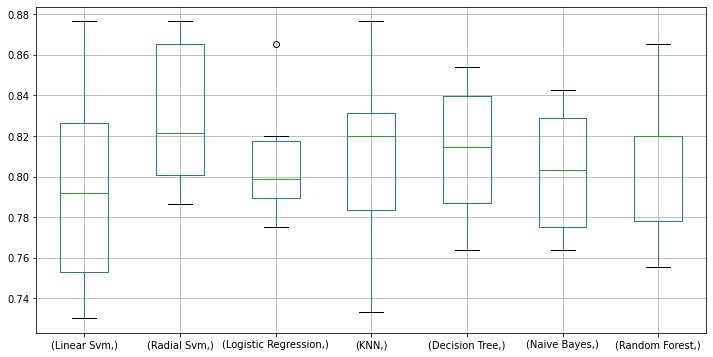

In [62]:
plt.subplots(figsize=(12,6))
box = pd.DataFrame(accuracy, index = [classifiers])
box.T.boxplot()

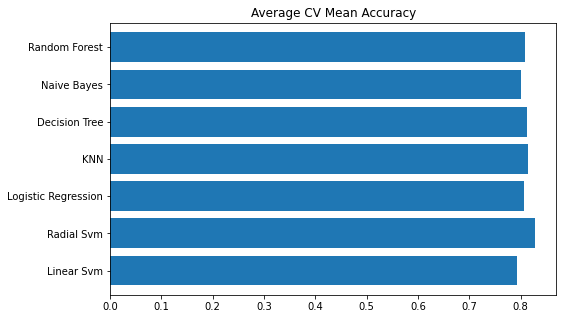

In [63]:
new_models_dataframe2['CV Mean'].plot.barh(width = 0.8)
plt.title('Average CV Mean Accuracy')
fig = plt.gcf()
fig.set_size_inches(8,5)
plt.show()

분류 정확도는 데이터 불균형으로 인해 잘못된 결론을 낼 수 있습니다. 

혼동행렬을 이용해 요약된 결과를 얻을 수 있는데,
이 혼동행렬은 모델이 어디에서 잘못되었는지, 

어떤 클래스를 모델이 잘못 예측했는지를 보여줍니다.

## Confusion Matrix

혼동행렬은 분류기에 의해 나온 정확한, 또는 부정확한 분류의 개수를 보여줍니다.



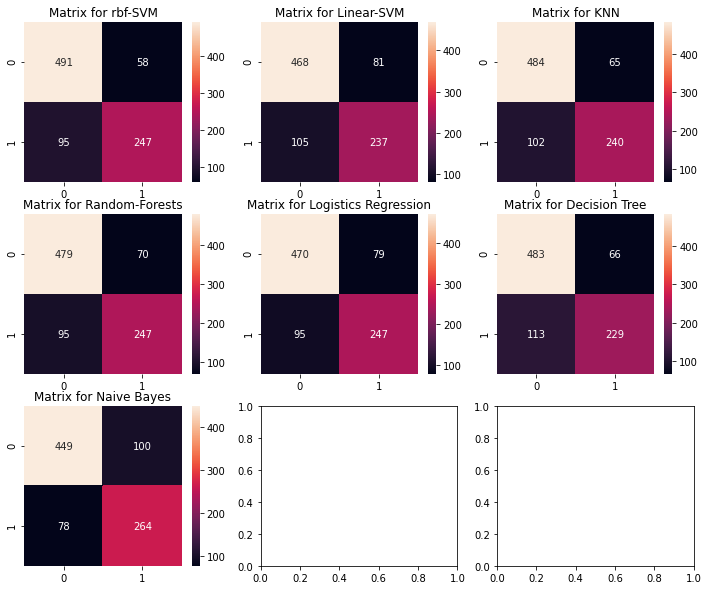

In [64]:
f, ax = plt.subplots(3, 3, figsize=(12,10))

y_pred = cross_val_predict(svm.SVC(kernel='rbf'), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[0,0], annot=True, fmt = '2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')

y_pred = cross_val_predict(svm.SVC(kernel='linear'), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[0,1], annot=True, fmt = '2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[0,2], annot=True, fmt = '2.0f')
ax[0,2].set_title('Matrix for KNN')

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[1,0], annot=True, fmt = '2.0f')
ax[1,0].set_title('Matrix for Random-Forests')

y_pred = cross_val_predict(LogisticRegression(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[1,1], annot=True, fmt = '2.0f')
ax[1,1].set_title('Matrix for Logistics Regression')

y_pred = cross_val_predict(DecisionTreeClassifier(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[1,2], annot=True, fmt = '2.0f')
ax[1,2].set_title('Matrix for Decision Tree')

y_pred = cross_val_predict(GaussianNB(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[2,0], annot=True, fmt = '2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')

plt.subplots_adjust(hspace=0.2, wspace = 0.2)
plt.show()

**혼동행렬의 해석**

왼상단-우하단 대각선은 각 객체에 대해 정확한 예측의수, 우상단-좌하단 대각선은 잘못된 예측의 수를 말합니다.

첫번째 plot의 rbf-SVM을 보겠습니다.

1) 정확한 예측의 수는 491(사망) + 247(생존) 으로 평균 CV 정확도(mean CV accuracy)는 (491+247)/891 = 82.8% 입니다.

2) Errors(오류) --> 58명의 사망자들이 생존자로 분류되었고, 95명의 생존자들이 사망자로 분류되었습니다.
죽은 사람을 살아있다고 예측하면서 더 많은 실수가 발생했습니다.

각각의 행렬을 보면 rbf-SVM이 사망자를 예측하는데 보다 정확하다고 볼 수 있습니다.
반면, Naive Bayes는 생존자를 예측하는데 보다 정확했습니다.

\
**하이퍼 파라미터 튜닝**


머신러닝 모델은 블랙박스 같습니다. 이 블랙박스에는 기본 파라미터 값이 있는데, 우리는 이것을 조절함으로써 더 좋은 모델을 얻을 수 있습니다.
SVM 모델의 C와 gamma같이 다른 분류기에는 다른 파라미터들이 있는데, 이들을 하이퍼 파라미터라고 합니다.
이 하이퍼 파라미터를 튜닝해서 모델의 학습률을 변경해줄 수 있고 더 좋은 모델을 얻을 수 있습니다. 이것을 하이퍼 파라미터 튜닝이라고 합니다.

좋은 결과를 보였던 2개 분류기(SVM, Random Forest)의 하이퍼파라미터를 튜닝하겠습니다.

## SVM

In [65]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel' : kernel, 'C' : C, 'gamma' : gamma}
gd=GridSearchCV(estimator=svm.SVC(), param_grid=hyper, verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8282593685267716
SVC(C=0.4, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.3, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:   18.7s finished


## Random Forests

In [66]:
n_estimators = range(100, 1000, 100)
hyper = { 'n_estimators' : n_estimators }
gd = GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=hyper, verbose = True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   32.5s finished


0.819327098110602
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


Rbf-SVM의 최고 점수는 C = 0.5, gamma = 0.1 일 때인 82.82%이고, RandomForest는 n_estimators=900일 때인 81.7% 입니다.

## Ensembling
앙상블은 모델의 정확도와 성능을 높이기 위한 좋은 방법입니다.

간단한 말로, 하나의 강력한 모델을 만들기 위한 여러 단순한 모델의 조합입니다.

핸드폰을 사기 위해 많은 사람들에게 여러 파라미터에 대해 질문을 했다고 가정합시다.

그 후 우리는 모든 다른 파라미터들을 분석 한 뒤에 한 제품에 대한 강한 판단을 할 수 있을 것입니다.

이것이 모델의 안정성을 향상시켜주는 앙상블입니다. 앙상블은 다음의 방법으로 수행할 수 있습니다.

1) Voting Classifier

2) Bagging

3) Boosting

## Voting Classifier

Voting Classifier는 많고 다양한 단순한 학습 모델로부터 예측들을 결합하는 가장 단순한 방법입니다.

예측값은 각 서브모델 예측치의 평균치입니다. 각 서브모델들은 다 다른 유형의 모델입니다.

In [67]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf = VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=10)),
                                                                            ('RBF', svm.SVC(probability=True, kernel = 'rbf', C=0.5, gamma = 0.1)),
                                                                            ('RFor', RandomForestClassifier(n_estimators=900, random_state=0)),
                                                                            ('LR', LogisticRegression(C=0.05)),
                                                                            ('DT', DecisionTreeClassifier(random_state=0)),
                                                                            ('NB', GaussianNB()),
                                                                            ('svm', svm.SVC(kernel='rbf', probability = True)) ],
                                                        voting='soft').fit(train_X, train_Y)
print('The accuracy for ensembled model is: ', ensemble_lin_rbf.score(test_X, test_Y))
cross = cross_val_score(ensemble_lin_rbf, X, Y, cv = 10, scoring = 'accuracy')
print('The cross validated score is ', cross.mean())

The accuracy for ensembled model is:  0.8171641791044776
The cross validated score is  0.8226716604244693


## Bagging

배깅은 일반적인 앙상블 방법입니다.

데이터셋의 작은 파티션에 대해 유사한 분류기들을 적용하고, 모든 예측치에 대한 평균을 적용함으로써 작용합니다.
평균화를 통해 분산이 감소됩니다. Voting Classifier와는 달리 배깅은 유사한 분류기를 사용합니다.

**Bagged KNN**

배깅은 분산이 높은 모델에 가장 잘 작용합니다. 그 예는 Decision Tree나 Random Forests 입니다.

우리는 n_neighbor의 작은 값을 적용하여 KNN을 n_neighbors의 작은 값으로 사용해보겠습니다.

In [68]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3), random_state=0, n_estimators=700)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy for bagged KNN is : ', metrics.accuracy_score(prediction, test_Y))
result = cross_val_score(model, X, Y, cv = 10, scoring='accuracy')
print('The cross validated score for bagged KNN is: ', result.mean())

The accuracy for bagged KNN is :  0.835820895522388
The cross validated score for bagged KNN is:  0.8160424469413232


**Bagged Decision Tree**

In [69]:
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=0, n_estimators=100)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy for bagged Decision Tree is: ', metrics.accuracy_score(prediction, test_Y))
result = cross_val_score(model, X, Y, cv = 10, scoring = 'accuracy')
print('The cross validated score for bagged Decision Tree is: ', result.mean())

The accuracy for bagged Decision Tree is:  0.8246268656716418
The cross validated score for bagged Decision Tree is:  0.8227590511860174


## Boosting

부스팅은 분류기의 순차적인 학습을 이용한 앙상블 기법입니다. 순차적으로 약한 모델을 향상시켜나갑니다.

부스팅은 아래와 같이 작동합니다 :

모델은 처음 전체 데이터셋에 대해 학습합니다. 이 때 모델은 일부 객체는 올바르게, 일부 객체는 틀리게 예측할 것입니다.
그 다음 시행에서, 틀리게 예측한 객체에 더욱 가중치를 두어 학습합니다. 결과적으로 틀리게 예측한 객체를 올바르게 예측하려고 노력합니다.
이런 과정이 반복되면서, 정확도가 한계에 도달할 때까지 새 분류기가 모델에 추가됩니다.

**AdaBoost(Adaptive Boosting)**

이번 케이스에서 약한 학습기는 Decision Tree입니다. 하지만 우리는 기본 base_estimator를 우리의 선택에 따라 다른 알고리즘으로 바꿀수 있습니다.

In [70]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=200, random_state = 0, learning_rate = 0.1)
result = cross_val_score(ada, X, Y, cv=10, scoring = 'accuracy')
print('The cross validated score for AdaBoost is: ', result.mean())

The cross validated score for AdaBoost is:  0.8249188514357055


**Stochastic Gradient Boosting**

이번에도 약한 학습기는 Decision Tree 입니다.

In [71]:
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier(n_estimators=500, random_state=0, learning_rate = 0.1)
result = cross_val_score(grad, X, Y, cv=10, scoring = 'accuracy')
print('The cross validated score for Gradient Boosting is: ', result.mean())

The cross validated score for Gradient Boosting is:  0.8115230961298376


**XGBoost**

In [72]:
import xgboost as xg
xgboost = xg.XGBClassifier(n_estimators=900, learning_rate = 0.1)
result = cross_val_score(xgboost, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for XGBoost is: ', result.mean())

The cross validated score for XGBoost is:  0.8115480649188515


**AdaBoost**가 가장 높은 정확도를 기록했습니다. 이 정확도를 하이퍼파라미터 튜닝을 통해 더 높여보겠습니다.

\
**AdaBoost의 하이퍼 파라미터 튜닝**

In [73]:
n_estimators = list(range(100, 1100, 100))
learning_rate = [0.05, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
hyper = {'n_estimators' : n_estimators, 'learning_rate' : learning_rate}
gd = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=hyper, verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8293892411022534
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,
                   n_estimators=100, random_state=None)


[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:  8.2min finished


AdaBoost의 정확도는 n_estimator가 100, learning_rate = 0.1일 때 82.93%로 가장 높았습니다.

베스트 모델에 대한 혼동행렬

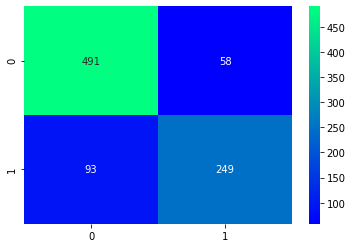

In [74]:
ada = AdaBoostClassifier(n_estimators=200, random_state=0,learning_rate = 0.05)
result = cross_val_predict(ada, X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, result), cmap='winter', annot=True, fmt = '2.0f')
plt.show()

## Feature Importance

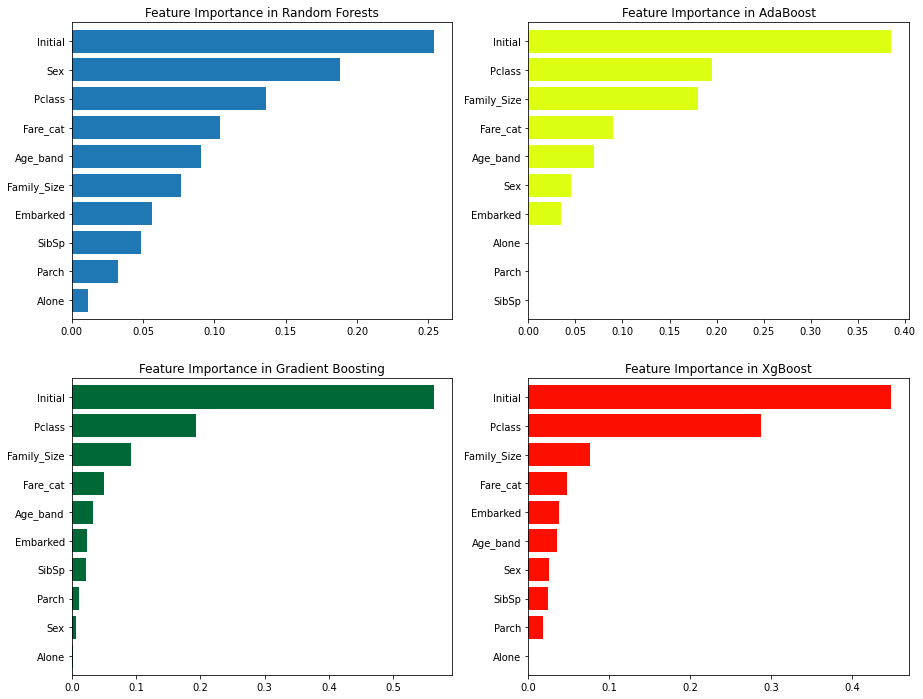

In [75]:
f,ax=plt.subplots(2,2,figsize=(15,12))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()

Random Forest, AdaBoost 등 여러 모델들에 대한 feature importance를 볼 수 있습니다.

1) 공통적으로 중요한 feature는 Initial ,Fare_cat, Pclass, Family_Size 입니다.

2) Sex 는 그렇게 중요도가 높지 않았는데, 앞선 분석에서 Pclass와 함께 보았을 때 성별이 중요한 요소였던 것을 생각하면 놀라운 결과입니다.
성별은 Random Forest 모델에서만 중요해보입니다.

하지만 많은 분류기의 최상단에 있는 Initial은 Sex과 양의 상관관계에 있습니다. 결국, 두 정보 모두 성별에 대한 정보를 담고 있습니다.

3) 이와 비슷하게 Pclass와 Fare_cat 모두 탑승객의 지위와 Family_Size, Alone, Parch, SibSp의 정보를 담고 있습니다.